<a href="https://colab.research.google.com/github/wahyunh10/Employee-Turnover-Project/blob/main/employe_turnover_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Can you help reduce employee turnover?**

**Background**

You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

**The data**

The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

* "department" - the department the employee belongs to.
* "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
* "review" - the composite score the employee received in their last evaluation.
* "projects" - how many projects the employee is involved in.
* "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
* "tenure" - how many years the employee has been at the company.
* "satisfaction" - a measure of employee satisfaction from surveys.
* "avg_hrs_month" - the average hours the employee worked in a month.
* "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [4]:
df = pd.read_csv('employee turnover.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


**# Create a report that covers the following:**
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

In [8]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [9]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [10]:
df.isnull().sum() 
# checking if there is a null values  

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

**1. Which department has the highest employee turnover? Which one has the lowest?**

In [11]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [12]:
department_left=df[["department","left"]]
# we have created a DataFrame in which there are 2 feature (department and left)

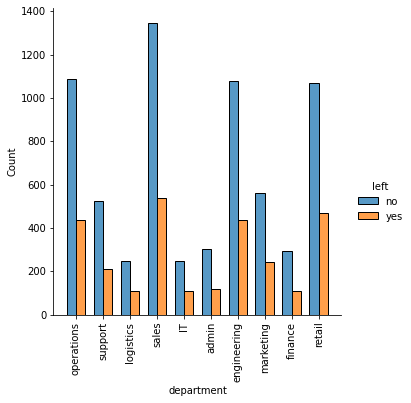

In [13]:
sns.displot(data=department_left,x="department",hue="left",multiple="dodge",shrink=.7,)
plt.xticks(rotation=90)
plt.show()

by the above plt we cannot come a conclution that sales have highest turnover because the department values are not uniform for this we have to take a percentage of each department with respect to left feature

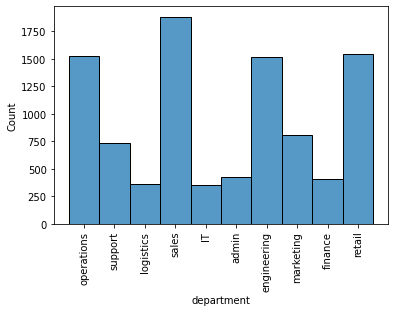

In [15]:
sns.set_style
sns.histplot(df["department"])
plt.xticks(rotation=90)
plt.show()
# in this plot we want to count the values of each department 

In [16]:
turnover_department={}
# created a dictonary so we can store the department turnover percentage in respect to the left 

In [17]:
for d in df["department"].unique():
    turnover_department[d]=df[(df["department"]==d)&(df["left"]=="yes")].count()[0]/(df[(df["department"]==d)].count()[0])*100
#     print(df[(df["department"]==d)&(df["left"]=="yes")].count()[0])

In [18]:
hightest_turnover=max(turnover_department,key=turnover_department.get),max(turnover_department.values())
lowest_turnover=min(turnover_department,key=turnover_department.get),min(turnover_department.values())

In [19]:
turnover_department

{'IT': 30.89887640449438,
 'admin': 28.132387706855795,
 'engineering': 28.825857519788915,
 'finance': 26.865671641791046,
 'logistics': 30.833333333333336,
 'marketing': 30.29925187032419,
 'operations': 28.64651773981603,
 'retail': 30.564568462037638,
 'sales': 28.51832182687201,
 'support': 28.843537414965986}

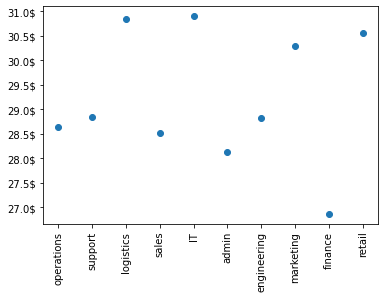

('IT', 30.89887640449438) maximum turn over
('finance', 26.865671641791046) minimum turn over


In [20]:
# fig, ax1 = plt.subplots()
plt.scatter(turnover_department.keys(),turnover_department.values())
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{}$'.format))
plt.show()
print(f"{hightest_turnover} maximum turn over")
print(f"{lowest_turnover} minimum turn over")

## this plot shows the percentage 